import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def llamarDatos (nombreArchivo,prueba):
    import os
    import pandas as pd
    serie=os.path.join('.','Data','09-04-18 Hover',prueba,nombreArchivo+'.csv')
    serie_pd = pd.read_csv(serie, sep = ',',encoding='latin-1')
    return serie_pd

def datos(nombreArchivo,Fuerza,prueba):
    data=llamarDatos(nombreArchivo,prueba)
    RPM=data['Motor Electrical Speed (RPM)'][~np.isnan(data[Fuerza])]
    fuerza=data[Fuerza][~np.isnan(data[Fuerza])]
    time=data['Time (s)'][~np.isnan(data[Fuerza])]
    return time,RPM,fuerza

def plots(nombreArchivo,prueba):
    thrust=datos(nombreArchivo,'Thrust (N)',prueba )[2]
    torque=datos(nombreArchivo,'Torque (NÂ·m)',prueba)[2]
    
    timeTh=datos(nombreArchivo,'Thrust (N)',prueba )[0]
    timeT=datos(nombreArchivo,'Torque (NÂ·m)',prueba)[0]
    
    RPMTh=datos(nombreArchivo,'Thrust (N)',prueba )[1]
    RPMT=datos(nombreArchivo,'Torque (NÂ·m)',prueba)[1]
    
    plt.figure(1)#RPM vs Thrust
    plt.plot(RPMTh,thrust,'b^')
    plt.xlabel('RPM')
    plt.ylabel('Thrust [N]')
    plt.savefig(nombreArchivo+'_Thrust_vs_RPM')
    plt.show
    
    plt.figure(2)#RPM vs Torque
    plt.plot(RPMT,torque,'b^')
    plt.xlabel('RPM')
    plt.ylabel('Torque [Nm]')
    plt.savefig(nombreArchivo+'_Torque_vs_RPM')
    plt.show
    
    plt.figure(3)#Torque vs Time
    plt.plot(timeT,torque,'b-')
    plt.xlabel('Time')
    plt.ylabel('Torque [Nm]')
    plt.savefig(nombreArchivo+'_Torque_vs_Time')
    plt.show
    
    plt.figure(4)#Thrust vs Time
    plt.plot(timeTh,thrust,'b-')
    plt.xlabel('Time')
    plt.ylabel('Thrust [N]')
    plt.savefig(nombreArchivo+'_Thrust_vs_Time')
    plt.show
    
    plt.figure(5)#Torque vs Time
    plt.plot(timeTh,RPMTh,'b-')
    plt.xlabel('Time')
    plt.ylabel('RPM')
    plt.savefig(nombreArchivo+'_RPM_vs_Time')
    plt.show
    return

## From here

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def paths(fecha, tipoPrueba):
    import glob
    import os
    direc=os.path.join('.','Data',fecha+' '+tipoPrueba,'*.csv')
    path=[]
    for fname in glob.glob(direc):
        path.append(fname)
    return path

In [45]:
def llamarDatos (fecha,tipoPrueba):
    import pandas as pd
    archives=paths(fecha,tipoPrueba)
    dfs={}
    for serie in archives:
        serie_pd = pd.read_csv(serie, sep = ',',encoding='latin-1')
        dfs[serie] = pd.DataFrame(serie_pd)
    return dfs 


In [46]:
def datos(fecha,tipoPrueba,fuerza):
    import pandas as pd
    data=llamarDatos(fecha,tipoPrueba)
    directs=paths(fecha,tipoPrueba)
    df2={}
    rows=[]
    nrows=[]
    for path in directs:
        data_act=data[path]
        RPM=data_act['Motor Electrical Speed (RPM)']
        Fuerza=data_act[fuerza]
        time=data_act['Time (s)']
        df={'RPM': RPM,fuerza: Fuerza,'time': time}
        df3=pd.DataFrame(df)
        df2[path]=df3.fillna(method='ffill')
        df2[path]=df2[path].fillna(0)
        zero_ind=np.array(df2[path][df2[path]['RPM']<900].index)
        df2[path]=df2[path].drop(zero_ind)
        row=np.shape(df2[path]['RPM'])
        rows.append(row)
    r_min=np.min(rows)
    indicess=[]
    for path in directs:
        row=np.shape(df2[path]['RPM'])
        indices=np.array(df2[path]['RPM'][r_min:].index)
        df2[path]=df2[path].drop(indices)
        nrow=np.shape(df2[path]['RPM'])
        nrows.append(nrow)
        indicess.append(indices)
    return df2

In [47]:
def densidad (R,T,P):
    Rm=np.mean(R)/100; Tm=np.mean(T)+273.15; Pm=np.mean(P)*100
    Rd=np.std(R)/100; Td=np.std(T)+273.15; Pd=np.std(P)*100
    esm=(1.7526*10**-11)*np.exp(5315.56/Tm)
    esd=(1.7526*10**-11)*np.exp(5315.56/Td)
    rhom=(0.0034847/Tm)*(Pm-0.003796*Rm*esm)
    rhod=(0.0034847/Tm)*(Pd-0.003796*Rd*esd)
    rhosim=0.877
    err=(rhom-rhosim)*100/rhosim
    return print('rho=%.3f +- %.3g[kg/m^3] con un error del %.3g respecto a la simulación'% (rhom, rhod,err))

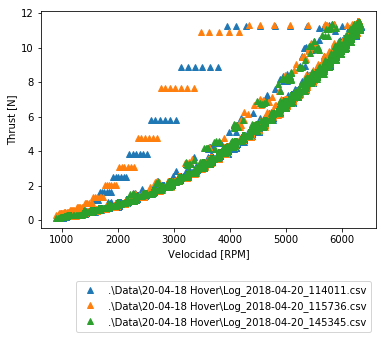

In [48]:
fecha='20-04-18'
Tipo='Hover'
dataTh=datos(fecha,Tipo,'Thrust (N)')
dataTo=datos(fecha,Tipo,'Torque (NÂ·m)')
Ps=paths(fecha,Tipo)
for p in Ps:
    plt.plot(dataTh[p]['RPM'],dataTh[p]['Thrust (N)'],'^',label=p)
    plt.legend(loc='lower right', bbox_to_anchor=(1, -0.5))
    plt.xlabel('Velocidad [RPM]');plt.ylabel('Thrust [N]')

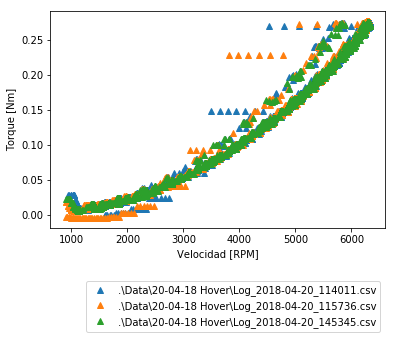

In [49]:
for p in Ps:
    plt.plot(dataTo[p]['RPM'],dataTo[p]['Torque (NÂ·m)'],'^',label=p)
    plt.legend(loc='lower right', bbox_to_anchor=(1, -0.5))
    plt.xlabel('Velocidad [RPM]');plt.ylabel('Torque [Nm]')

In [50]:
R=[68.8,68.7,68.8]; T=[17.6,17.7,18.1]; P=[746.61,746.62,746.62]
densidad(R,T,P)

rho=0.894 +- 5.65e-06[kg/m^3] con un error del 1.96 respecto a la simulación


In [51]:
def promedios(fecha,tipoPrueba,fuerza):
    data=datos(fecha,Tipo,fuerza)
    Ps=paths(fecha,Tipo)
    RPMm=0;fuerzam=0
    for p in Ps:
        RPMm+=data[p]['RPM']
        fuerzam+=data[p][fuerza]
    return (1/3)*RPMm,(1/3)*fuerzam

In [85]:
def DSTD(fecha,tipoPrueba,fuerza):
    data=datos(fecha,Tipo,fuerza)
    Ps=paths(fecha,Tipo)
    l=len(data[Ps[0]]['RPM'])
    RPMd=np.zeros((l,len(Ps)));fuerzad=np.zeros((l,len(Ps)))
    for p in Ps:
        i=Ps.index(p)
        RPMd[:,i]=data[p]['RPM']
        fuerzad[:,i]=data[p][fuerza]
    DSTD_RPM=np.std(RPMd,axis=1)
    DSTD_fuerza=np.std(fuerzad,axis=1)/10
    return DSTD_RPM,DSTD_fuerza

## 20-04-18

In [91]:
fecha='20-04-18'
Tipo='Hover'
th='Thrust (N)'
to='Torque (NÂ·m)'
#Datos crudos
dataTh=datos(fecha,Tipo,th)
dataTo=datos(fecha,Tipo,to)
#Promedios con errores
R,Th=promedios(fecha,Tipo,th);stdTh=DSTD(fecha,Tipo,th)[1]
Ro,To=promedios(fecha,Tipo,to);stdTo=DSTD(fecha,Tipo,to)[1]
#Errores promedio
Errth=np.mean(stdTh);Errto=np.mean(stdTo)

### Raw Data

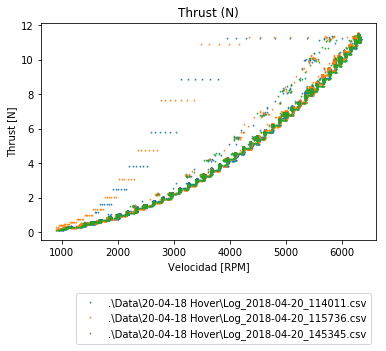

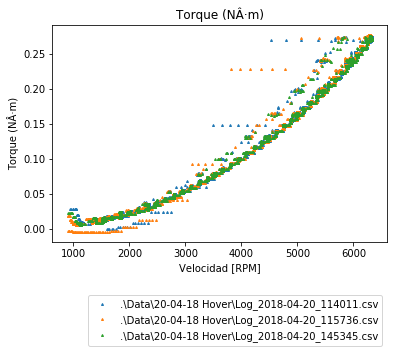

In [92]:
Ps=paths(fecha,Tipo)
for p in Ps:
    plt.figure(1)
    plt.plot(dataTh[p]['RPM'],dataTh[p][th],'^',markersize=1,label=p)
    plt.legend(loc='lower right', bbox_to_anchor=(1, -0.5))
    plt.xlabel('Velocidad [RPM]');plt.ylabel('Thrust [N]'); plt.title(th)
for p in Ps:
    plt.figure(2)
    plt.plot(dataTo[p]['RPM'],dataTo[p][to],'^',markersize=2,label=p)
    plt.legend(loc='lower right', bbox_to_anchor=(1, -0.5))
    plt.xlabel('Velocidad [RPM]');plt.ylabel(to);plt.title(to)

## Mean and error bars

Error Promedio de Empuje =0.010; Error Promedio de Torque=0.000242


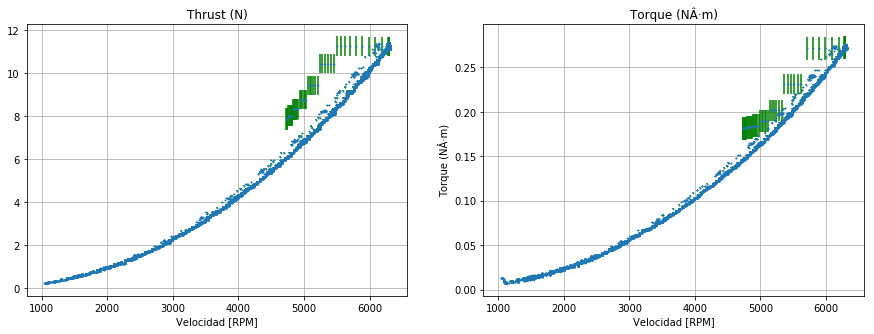

In [96]:
plt.figure(2)
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(15,5))
axs[0].errorbar(R, Th, yerr=stdTh,fmt='o',markersize=1, ecolor='g', capthick=0.2);axs[0].grid()
axs[0].set_title(th);axs[0].set_xlabel('Velocidad [RPM]') ;axs[1].set_ylabel(th)

axs[1].errorbar(R, To, yerr=stdTo,fmt='o', markersize=1, ecolor='g', capthick=0.2);axs[1].grid()
axs[1].set_title(to);axs[1].set_xlabel('Velocidad [RPM]') ;axs[1].set_ylabel(to)

print('Error Promedio de Empuje =%.3f; Error Promedio de Torque=%.3g' %(Errth,Errto))